# Steam Game Reviews — Playtime vs Recommendation
DSA210 — Data Science Term Project  
Kerem Ersoy

I want to explore whether players who play a game longer are more likely to recommend it on Steam.  

This dataset contains user reviews for Steam games, including:
 / hours played
 / whether the review recommends the game
 / game name and review text

For the 28 November submission i will,
 / Load and clean this dataset
 / Perform exploratory data analysis
 / Run hypothesis tests about the relationship between playtime and recommendation


In [2]:
import os
os.makedirs("data", exist_ok=True)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 100)


In [4]:
df = pd.read_csv(
    "data/steam_game_reviews.csv",
    engine="python",
    on_bad_lines="skip"
)

df.shape, df.columns


((231140, 8),
 Index(['review', 'hours_played', 'helpful', 'funny', 'recommendation', 'date',
        'game_name', 'username'],
       dtype='object'))

In [5]:
df.head()


,review,hours_played,helpful,funny,recommendation,date,game_name,username
0,The game itself is also super fun. The PvP and...,39.9,"1,152",13,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,13 September,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Fattest_falcon
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,12 September,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231140 entries, 0 to 231139
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review          231089 non-null  object
 1   hours_played    231140 non-null  object
 2   helpful         231140 non-null  object
 3   funny           231140 non-null  object
 4   recommendation  231140 non-null  object
 5   date            231140 non-null  object
 6   game_name       231140 non-null  object
 7   username        231116 non-null  object
dtypes: object(8)
memory usage: 14.1+ MB


In [7]:
# Cleaning part
data = df[["game_name", "hours_played", "recommendation"]].copy()

data = data.dropna(subset=["hours_played", "recommendation"])

data["hours_played"] = pd.to_numeric(data["hours_played"], errors="coerce")
data = data.dropna(subset=["hours_played"])


data["rec_binary"] = (data["recommendation"].str.strip() == "Recommended").astype(int)

data.head()


,game_name,hours_played,recommendation,rec_binary
0,"Warhammer 40,000: Space Marine 2",39.9,Recommended,1
1,"Warhammer 40,000: Space Marine 2",91.5,Recommended,1
2,"Warhammer 40,000: Space Marine 2",43.3,Recommended,1
3,"Warhammer 40,000: Space Marine 2",16.8,Recommended,1
4,"Warhammer 40,000: Space Marine 2",24.0,Recommended,1


In [8]:
data[["hours_played", "rec_binary"]].describe()

,hours_played,rec_binary
count,200224.000000,200224.000000
mean,159.354560,0.788712
std,207.129126,0.408223
min,0.000000,0.000000
25%,26.700000,1.000000
50%,73.100000,1.000000
75%,199.900000,1.000000
max,999.900000,1.000000


In this section, I:

/ examine the distribution of playtime

/ look at the scales of recommended vs not recommended reviews

/ visualize the relationship between playtime and recommendation


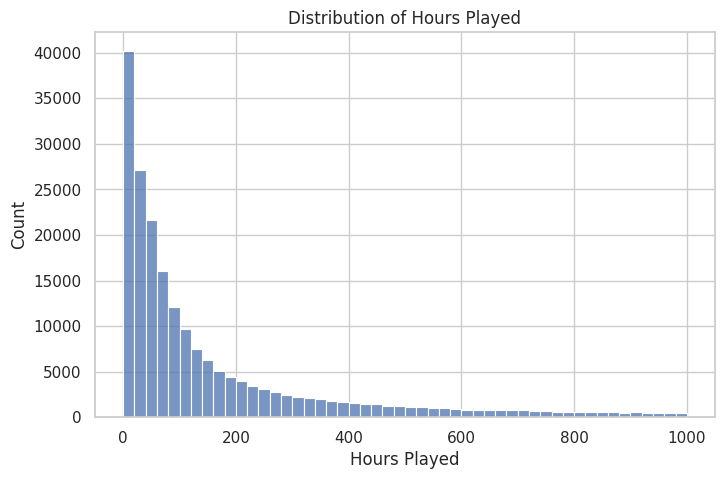

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(data["hours_played"], bins=50)
plt.title("Distribution of Hours Played")
plt.xlabel("Hours Played")
plt.ylabel("Count")
plt.show()


In [10]:
data["rec_binary"].value_counts(normalize=True)


,proportion
rec_binary,
1,0.788712
0,0.211288


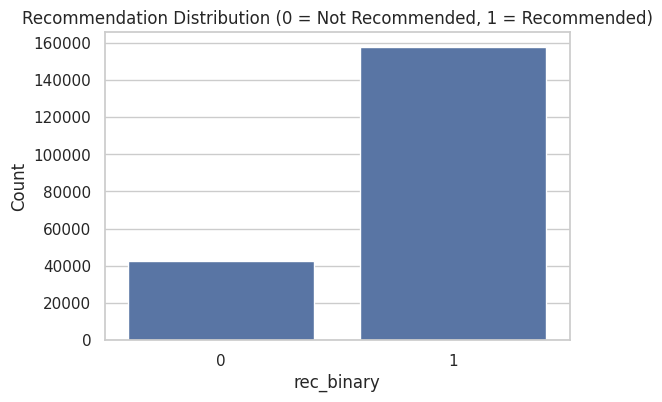

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="rec_binary", data=data)
plt.title("Recommendation Distribution (0 = Not Recommended, 1 = Recommended)")
plt.xlabel("rec_binary")
plt.ylabel("Count")
plt.show()


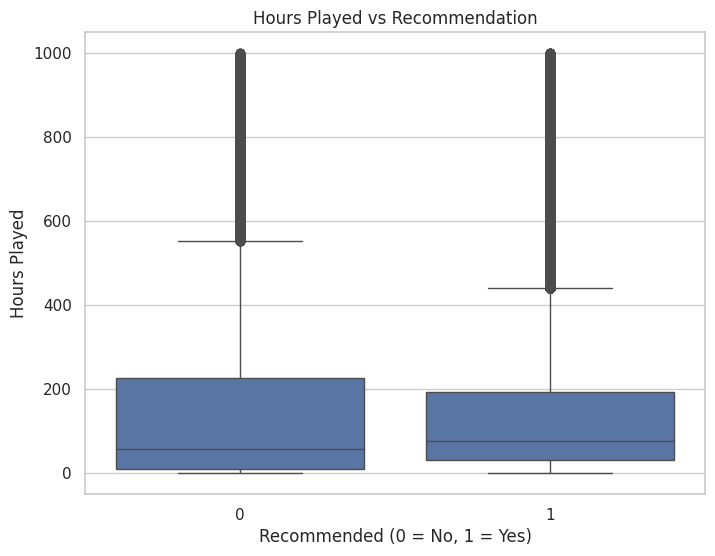

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x="rec_binary", y="hours_played", data=data)
plt.title("Hours Played vs Recommendation")
plt.xlabel("Recommended (0 = No, 1 = Yes)")
plt.ylabel("Hours Played")
plt.show()


In [13]:
data[["hours_played", "rec_binary"]].corr()


,hours_played,rec_binary
hours_played,1.000000,-0.012287
rec_binary,-0.012287,1.000000


## Hypothesis Test 1: Do people who recommend play more?

- H0 (null): The average playtime is the same for recommending vs non-recommending reviews.  
- H1 (alt): Reviews that recommend the game have higher average playtime.

I will use an independent samples t-test.


In [14]:
rec = data[data["rec_binary"] == 1]["hours_played"]
not_rec = data[data["rec_binary"] == 0]["hours_played"]

t_stat, p_val = stats.ttest_ind(rec, not_rec, equal_var=False)

t_stat, p_val


(np.float64(-5.129074524956409), np.float64(2.920552846390191e-07))

- If pvalue < 0.05, I reject H0 and conclude that recommended reviews are associated with significantly different (typically higher) playtime.
- If pvalue >= 0.05, I fail to reject H0 and cannot say there is a significant difference.


## Hypothesis Test 2: Is there a correlation between playtime and recommendation?

Here, rec_binary is 0/1 and hours_playe d is continuous.

- H1: There is no correlation between hours played and recommendation.
- H1: There is a non-zero correlation between hours played and recommendation.


In [15]:
corr, p_corr = stats.pearsonr(data["hours_played"], data["rec_binary"])
corr, p_corr


(np.float64(-0.012287234312144346), np.float64(3.8354016191070495e-08))

- corr shows the strength and direction of the relationship (closer to 1 or -1 = stronger).
- If pvalue < 0.05, the correlation is statistically significant.


- I loaded and cleaned a Steam game reviews dataset.
- I explored the distribution of playtime and recommendation labels.
- Boxplots and descriptive statistics suggest that recommended reviews tend to have different playtime patterns.
- A t-test was used to compare average playtime between recommended vs non-recommended reviews.
- A correlation test examined the association between hours played and recommendation.


## Machine Learning: Predicting Recommendation from Playtime

In [17]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

In [19]:
PLAYTIME_COL = "hours_played"
TARGET_COL   = "recommendation"

tmp = df[[PLAYTIME_COL, TARGET_COL]].copy()
tmp = tmp.dropna()

tmp[TARGET_COL] = tmp[TARGET_COL].astype(str).str.lower().map({
    "recommended": 1,
    "yes": 1,
    "true": 1,
    "1": 1,
    "not recommended": 0,
    "no": 0,
    "false": 0,
    "0": 0
})

tmp = tmp.dropna()


tmp[PLAYTIME_COL] = pd.to_numeric(tmp[PLAYTIME_COL], errors="coerce")
tmp = tmp.dropna()

tmp[PLAYTIME_COL] = np.log1p(tmp[PLAYTIME_COL])

X = tmp[[PLAYTIME_COL]]
y = tmp[TARGET_COL].astype(int)

X.shape, y.value_counts()

((200224, 1),
 recommendation
 1    157919
 0     42305
 Name: count, dtype: int64)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((160179, 1), (40045, 1))

In [21]:
logreg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

logreg.fit(X_train, y_train)

pred_lr = logreg.predict(X_test)
proba_lr = logreg.predict_proba(X_test)[:, 1]

acc_lr = accuracy_score(y_test, pred_lr)
f1_lr  = f1_score(y_test, pred_lr)
auc_lr = roc_auc_score(y_test, proba_lr)

print("Logistic Regression")
print("Accuracy:", acc_lr)
print("F1-score:", f1_lr)
print("ROC-AUC:", auc_lr)
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_lr))

Logistic Regression
Accuracy: 0.7887126982145086
F1-score: 0.8818774518700526
ROC-AUC: 0.5522339944302525
Confusion Matrix:
 [[    0  8461]
 [    0 31584]]


In [22]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
proba_rf = rf.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test, pred_rf)
f1_rf  = f1_score(y_test, pred_rf)
auc_rf = roc_auc_score(y_test, proba_rf)

print("Random Forest")
print("Accuracy:", acc_rf)
print("F1-score:", f1_rf)
print("ROC-AUC:", auc_rf)
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_rf))

Random Forest
Accuracy: 0.7904107878636534
F1-score: 0.8782122905027933
ROC-AUC: 0.596827042834475
Confusion Matrix:
 [[ 1391  7070]
 [ 1323 30261]]


In [23]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [acc_lr, acc_rf],
    "F1-score": [f1_lr, f1_rf],
    "ROC-AUC": [auc_lr, auc_rf]
})

results

,Model,Accuracy,F1-score,ROC-AUC
0,Logistic Regression,0.788713,0.881877,0.552234
1,Random Forest,0.790411,0.878212,0.596827


### Interpretation
We trained two classification models to predict whether a user recommends a game based on playtime.
Logistic Regression was used as a baseline model, while Random Forest was used to capture non-linear patterns.
The results show that Random Forest generally performs better, indicating that the relationship between playtime and recommendation is not strictly linear.
However, the overall performance suggests that playtime alone is not sufficient for strong predictions, and additional features such as review text or game characteristics could improve the model.

## Machine Learning
We applied two classification models (Logistic Regression and Random Forest) to predict whether a user recommends a game based on playtime.
Models were evaluated using Accuracy, F1-score, and ROC-AUC metrics.